In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

In [4]:
pd.options.display.max_columns = None

### Basic Data Information

In [5]:
df = pd.read_csv("train.csv")
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [6]:
df.shape

(69713, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [8]:
df.isna().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

<AxesSubplot:>

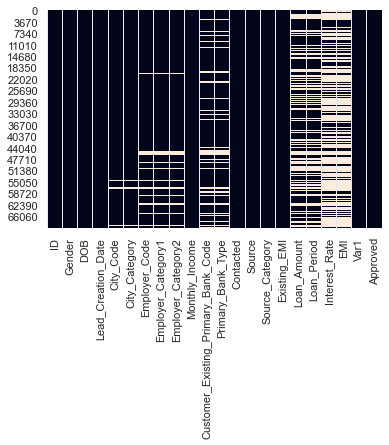

In [9]:
sns.heatmap(df.isna(), cbar=False)

In [10]:
df.isna().sum()/len(df)

ID                                     0.000000
Gender                                 0.000000
DOB                                    0.000215
Lead_Creation_Date                     0.000000
City_Code                              0.011676
City_Category                          0.011676
Employer_Code                          0.057636
Employer_Category1                     0.057636
Employer_Category2                     0.061653
Monthly_Income                         0.000000
Customer_Existing_Primary_Bank_Code    0.134709
Primary_Bank_Type                      0.134709
Contacted                              0.000000
Source                                 0.000000
Source_Category                        0.000000
Existing_EMI                           0.000732
Loan_Amount                            0.397472
Loan_Period                            0.397472
Interest_Rate                          0.680461
EMI                                    0.680461
Var1                                   0

In [11]:
# Most null values in Interest Rate, EMI followed by Loan Amount and Loan Period

#### Data Type Corrections

In [12]:
df1 = df.copy()
df1['DOB'] = pd.to_datetime(df1['DOB'])
df1['Lead_Creation_Date'] = pd.to_datetime(df1['Lead_Creation_Date'])

In [13]:
df1.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,1986-07-12,2016-04-07,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,1982-10-12,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,1989-01-30,2016-09-07,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [14]:
df1.loc[df1['Existing_EMI'] != 0, ["Existing_EMI", 'EMI']]

,Existing_EMI,EMI
4,2500.0,NaN
10,460.0,508.0
11,255.0,722.0
13,1000.0,NaN
23,133.3,609.0
...,...,...
69701,500.0,NaN
69702,845.0,NaN
69704,3400.0,546.0
69709,1450.0,NaN


#### Numerical and Categorical columns

In [15]:
num = df1.select_dtypes(include=np.number).columns
cat = df1.select_dtypes(include='object').columns
print("Numerical cols:", len(num), num, sep="\n")
print("Categorical cols:", len(cat), cat, sep="\n")

Numerical cols:
9
Index(['Employer_Category2', 'Monthly_Income', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')
Categorical cols:
11
Index(['ID', 'Gender', 'City_Code', 'City_Category', 'Employer_Code',
       'Employer_Category1', 'Customer_Existing_Primary_Bank_Code',
       'Primary_Bank_Type', 'Contacted', 'Source', 'Source_Category'],
      dtype='object')


#### Univariate Analysis

In [16]:
plt.rcParams['figure.figsize'] = (15, 8)

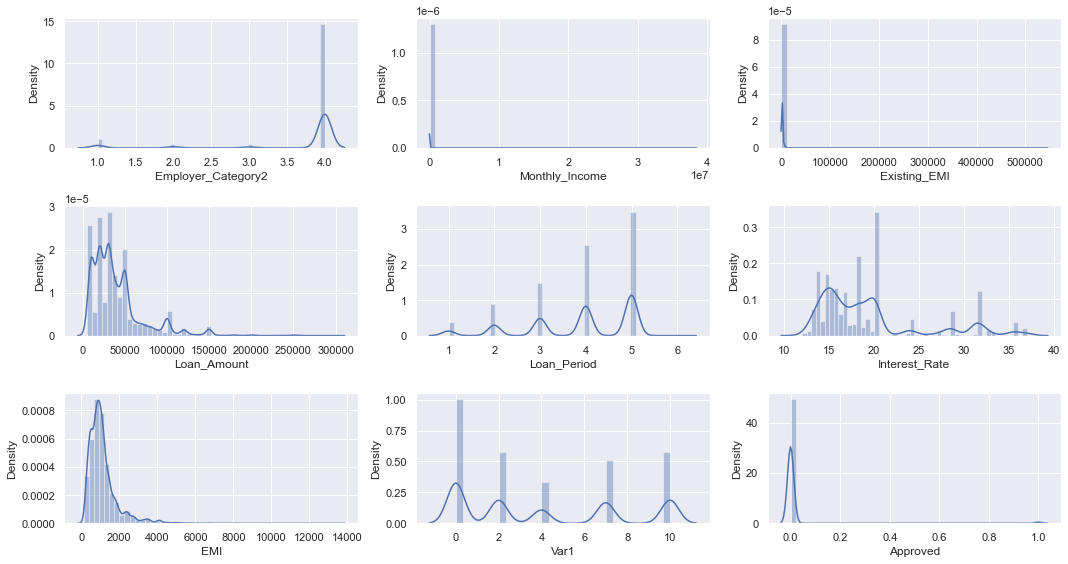

In [17]:
i = 1
for x in num:
    plt.subplot(3, 3, i)
    sns.distplot(df1[x])
    i += 1
plt.tight_layout()

#### Monthly Income is highly right skewed

<AxesSubplot:xlabel='Monthly_Income', ylabel='Density'>

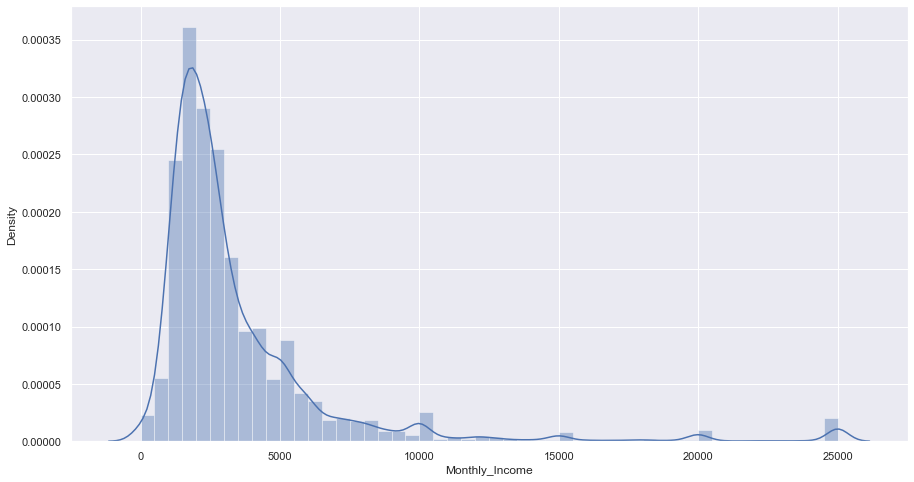

In [18]:
up = np.quantile(df1['Monthly_Income'], 0.99)

x = df1['Monthly_Income'].clip(upper=up)
sns.distplot(x)

In [19]:
# Few RICH people are skewing our data to the right (634)

In [20]:
df1.loc[df1['Monthly_Income'] > 25000, ['Monthly_Income', 'Employer_Category2', 'Existing_EMI', 'Loan_Amount', 'Approved']].sort_values(by='Monthly_Income', ascending=False).head(30)

,Monthly_Income,Employer_Category2,Existing_EMI,Loan_Amount,Approved
38774,38383838.3,4.0,0.0,150000.0,0
20442,12010013.2,NaN,545436.5,50000.0,0
22432,10000000.0,4.0,0.0,10000.0,0
54437,10000000.0,4.0,1150.0,150000.0,0
22509,10000000.0,4.0,0.0,150000.0,0
68021,10000000.0,4.0,3000.0,150000.0,0
3491,5495454.5,NaN,15000.0,100000.0,0
40108,5000000.0,4.0,0.0,50000.0,0
25179,4000078.5,4.0,785.6,20000.0,0
24171,2626262.6,4.0,0.0,20000.0,0


In [21]:
df1['Existing_EMI']

0           0.0
1           0.0
2           0.0
3           0.0
4        2500.0
          ...  
69708       0.0
69709    1450.0
69710       0.0
69711    1366.0
69712       0.0
Name: Existing_EMI, Length: 69713, dtype: float64

(<AxesSubplot:xlabel='Existing_EMI', ylabel='Density'>, nan)

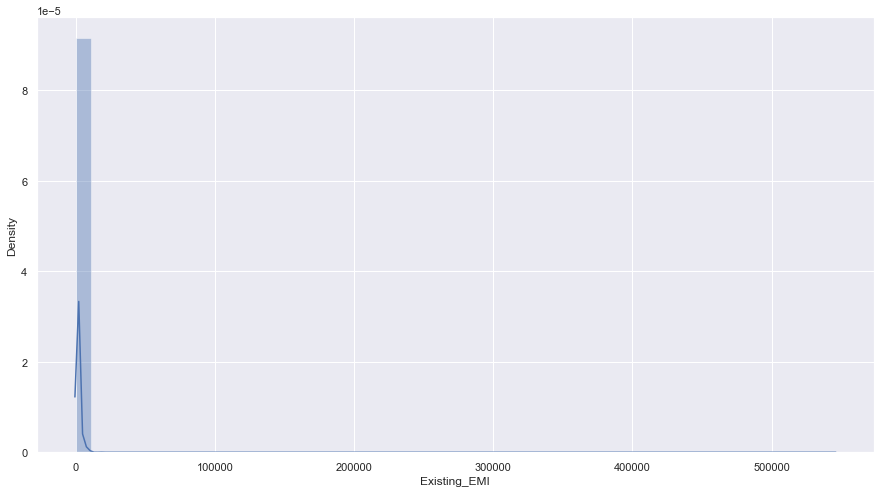

In [22]:
up = np.quantile(df1['Existing_EMI'], 0.01)

x = df1['Existing_EMI'].clip(upper=up)
sns.distplot(x), up

In [23]:
# Most Existing EMI Values are 0

In [24]:
for x in cat:
    print(x, df1[x].nunique())

ID 69713
Gender 2
City_Code 678
City_Category 3
Employer_Code 36617
Employer_Category1 3
Customer_Existing_Primary_Bank_Code 57
Primary_Bank_Type 2
Contacted 2
Source 29
Source_Category 7


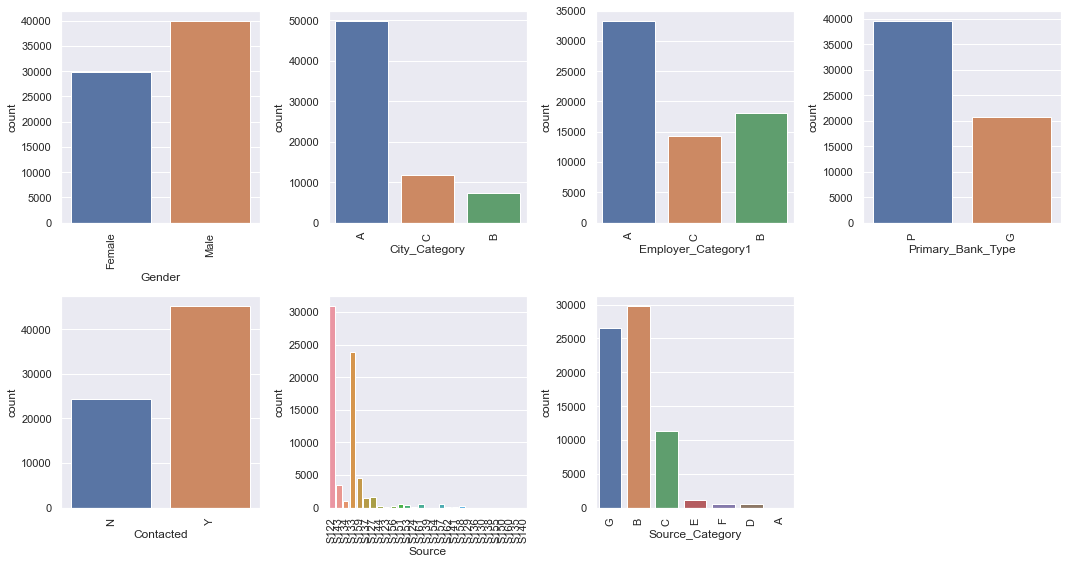

In [25]:
cat_new = cat.drop(["ID", "City_Code", "Employer_Code", "Customer_Existing_Primary_Bank_Code"])

i = 1
for x in cat_new:
    plt.subplot(2, 4, i)
    sns.countplot(df1[x])
    plt.xticks(rotation=90)
    i += 1
plt.tight_layout()

In [26]:
# Male applicants higher
# Most applicants from City Category A, employer Category1 A
# Private banks are higher
# Most leads are verified coming from Source Category B, C, G

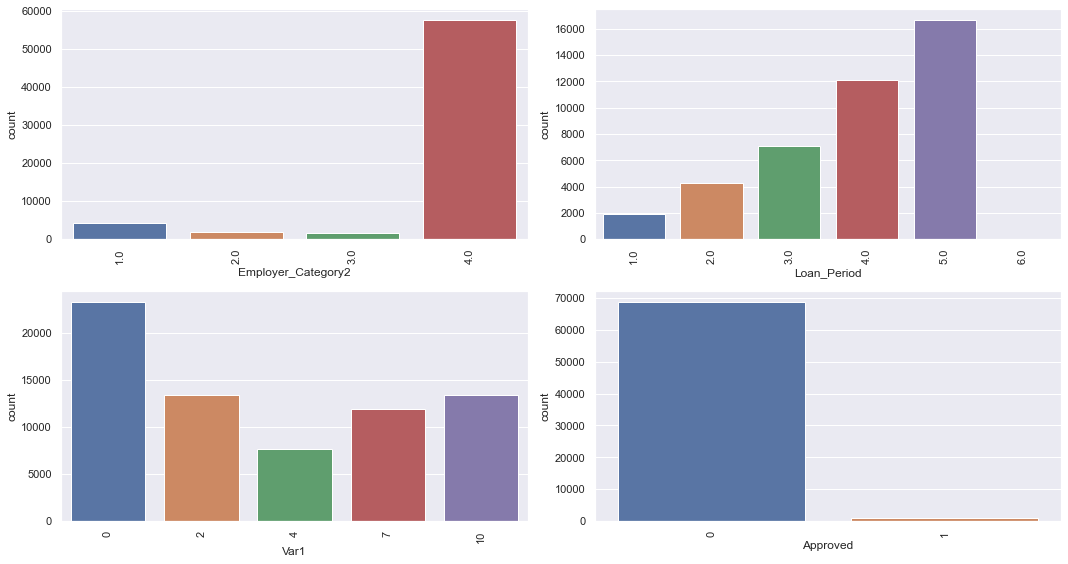

In [27]:
cat1 = ["Employer_Category2", "Loan_Period", "Var1", "Approved"]

i = 1
for x in cat1:
    plt.subplot(2, 2, i)
    sns.countplot(df1[x])
    plt.xticks(rotation=90)
    i += 1
plt.tight_layout()

#### EDA R&D

In [28]:
df1.loc[df1['Approved'] == 0, 'Approved'].shape[0]/len(df1)

0.9853685826173023

In [29]:
df1.loc[df1['Approved'] == 1, 'Primary_Bank_Type'].value_counts()

P    804
G    196
Name: Primary_Bank_Type, dtype: int64

In [30]:
# Higher chance of loan being approved by a Primary Bank

In [31]:
df1.groupby('Employer_Category1')['Employer_Category2'].value_counts()

Employer_Category1  Employer_Category2
A                   4.0                   30500
                    1.0                    2069
                    2.0                     291
                    3.0                     196
B                   4.0                   15612
                    2.0                    1113
                    3.0                     921
                    1.0                     410
C                   4.0                   11470
                    1.0                    1779
                    2.0                     551
                    3.0                     503
Name: Employer_Category2, dtype: int64

In [32]:
df1.loc[df1['Monthly_Income'] > 25000, ['Monthly_Income', 'Employer_Category1', 'Employer_Category2']].value_counts(['Employer_Category1', 'Employer_Category2'])

Employer_Category1  Employer_Category2
A                   4.0                   326
B                   4.0                   119
C                   4.0                    91
A                   1.0                    30
C                   1.0                    16
B                   2.0                    11
                    3.0                     6
                    1.0                     4
A                   2.0                     3
C                   2.0                     3
A                   3.0                     2
dtype: int64

In [33]:
df1.Monthly_Income.sort_values(ascending=False)

38774    38383838.3
20442    12010013.2
22432    10000000.0
54437    10000000.0
68021    10000000.0
            ...    
50069           0.0
50068           0.0
49264           0.0
49263           0.0
50825           0.0
Name: Monthly_Income, Length: 69713, dtype: float64

In [34]:
df1.loc[df1['Monthly_Income'] > 25000, ['ID', 'Monthly_Income']].sort_values(by='Monthly_Income', ascending=False).head(30)

,ID,Monthly_Income
38774,APPJ70184404909,38383838.3
20442,APPD50002916548,12010013.2
22432,APPA60086062823,10000000.0
54437,APPO90710036421,10000000.0
22509,APPO10994188022,10000000.0
68021,APPJ30744087518,10000000.0
3491,APPC80371942803,5495454.5
40108,APPW40887345212,5000000.0
25179,APPP60509993326,4000078.5
24171,APPY70484989831,2626262.6


<AxesSubplot:>

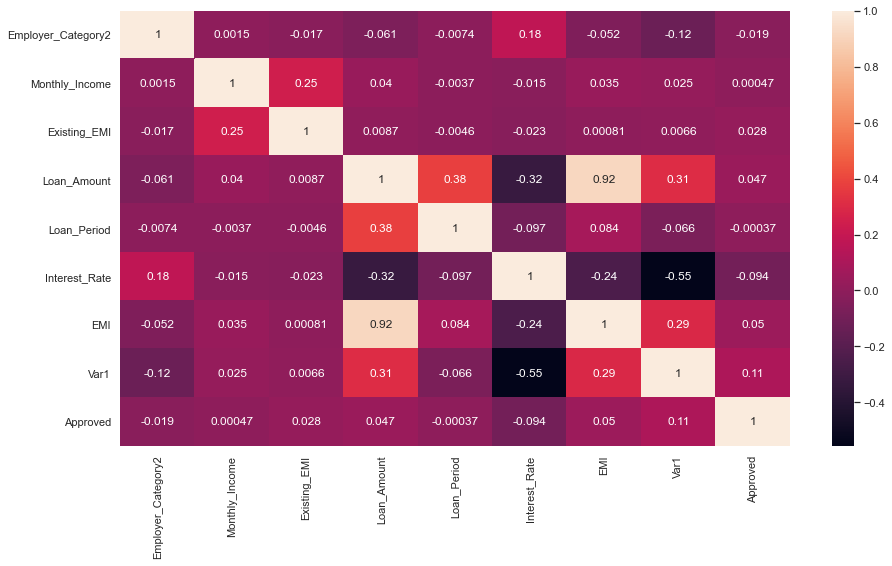

In [35]:
sns.heatmap(df.corr(), annot=True)

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Statistical Tests for Checking Relationships

##### Employer Category 2

In [37]:
model = ols("Interest_Rate ~ Employer_Category2", data=df1).fit()

sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Employer_Category2,1.0,23865.181873,23865.181873,719.881741,4.478301e-156
Residual,22102.0,732715.138459,33.151531,NaN,NaN


In [38]:
model = ols("Monthly_Income ~ Employer_Category2", data=df1).fit()

sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Employer_Category2,1.0,4.673236e+09,4.673236e+09,0.15639,0.692503
Residual,65413.0,1.954663e+15,2.988188e+10,NaN,NaN


In [39]:
import scipy.stats as stats

In [40]:
tbl = pd.crosstab(df1['Source_Category'], df1['Employer_Category2']).T

stats.chi2_contingency(tbl)

(174.41971782271395,
 1.217562691631264e-27,
 18,
 array([[1.95276313e-01, 1.93043654e+03, 7.26297699e+02, 2.74688680e+01,
         6.77608805e+01, 2.94867232e+01, 1.47635402e+03],
        [8.96583352e-02, 8.86332416e+02, 3.33469235e+02, 1.26119392e+01,
         3.11114423e+01, 1.35384086e+01, 6.77846901e+02],
        [7.42948865e-02, 7.34454483e+02, 2.76327448e+02, 1.04508140e+01,
         2.57803256e+01, 1.12185279e+01, 5.61694107e+02],
        [2.64077047e+00, 2.61057766e+04, 9.82190562e+03, 3.71468379e+02,
         9.16347352e+02, 3.98756340e+02, 1.99651050e+04]]))

In [41]:
tbl = pd.crosstab(df1['Primary_Bank_Type'], df1['Employer_Category2'])

stats.chi2_contingency(tbl)

(1221.5075293391658,
 1.5803505873225545e-264,
 3,
 array([[ 1414.60708718,   656.50084651,   531.97437015, 17805.91769616],
        [ 2720.39291282,  1262.49915349,  1023.02562985, 34242.08230384]]))

In [42]:
# Employer Category 2 affects Interest Rate, Bank Type and Source Category

In [43]:
df1.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,1986-07-12,2016-04-07,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,1982-10-12,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,1989-01-30,2016-09-07,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [44]:
df1.isna().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

In [45]:
df1.City_Code.nunique()

678

In [46]:
df1.groupby('City_Category')['City_Code'].nunique()

City_Category
A     15
B     31
C    632
Name: City_Code, dtype: int64

In [47]:
df1.Employer_Code.nunique()

36617

In [48]:
df1.groupby('Employer_Category1')['Employer_Code'].nunique()

Employer_Category1
A    22447
B     8629
C     5541
Name: Employer_Code, dtype: int64

In [49]:
df1.loc[df1['City_Code'].isna(), :]

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
12711,APPL60213508703,Male,1989-12-27,2016-07-19,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,NaN,Y,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
12715,APPQ30932694235,Male,1989-12-27,2016-07-19,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,NaN,Y,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
12717,APPT30773935518,Male,1989-12-27,2016-07-19,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,NaN,Y,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
12727,APPF40116522716,Male,1989-12-27,2016-07-19,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,NaN,Y,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
32212,APPR30962498932,Male,1987-12-03,2016-08-16,NaN,NaN,NaN,NaN,NaN,4166.7,NaN,NaN,Y,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69171,APPC10625766808,Female,1991-11-16,2016-09-30,NaN,NaN,NaN,NaN,NaN,2665.5,NaN,NaN,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
69173,APPF80467543148,Female,1986-10-10,2016-09-30,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
69174,APPG20889519217,Female,1984-10-31,2016-09-30,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
69175,APPH90191078331,Female,1992-07-08,2016-09-30,NaN,NaN,NaN,NaN,NaN,2700.0,NaN,NaN,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0


In [50]:
df1.isna().sum(axis=1)

0        4
1        0
2        2
3        2
4        2
        ..
69708    4
69709    4
69710    0
69711    2
69712    2
Length: 69713, dtype: int64

In [51]:
df1.loc[df1.City_Code.isna(),['City_Code','City_Category','Employer_Category1','Employer_Category2']].isnull().sum()

City_Code             814
City_Category         814
Employer_Category1    457
Employer_Category2    457
dtype: int64

In [52]:
df1['DOB_year'] = df1.DOB.dt.year
df1

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,DOB_year
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,1979.0
1,APPD40611263344,Male,1986-07-12,2016-04-07,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0,1986.0
2,APPE70289249423,Male,1982-10-12,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0,1982.0
3,APPF80273865537,Male,1989-01-30,2016-09-07,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0,1989.0
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0,1985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,APPU90955789628,Female,1983-07-31,2016-09-30,C10006,A,COM0000010,A,1.0,4900.0,B002,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,10,0,1983.0
69709,APPV80989824738,Female,2071-01-27,2016-09-30,C10116,C,COM0045789,A,4.0,7190.1,B002,P,N,S122,G,1450.0,NaN,NaN,NaN,NaN,7,0,2071.0
69710,APPW50697209842,Female,1992-01-02,2016-09-30,C10022,B,COM0013284,C,4.0,1600.0,B030,P,Y,S122,G,0.0,24000.0,4.0,35.50,943.0,2,0,1992.0
69711,APPY50870035036,Male,1978-06-27,2016-09-30,C10002,A,COM0000098,C,3.0,9893.0,B002,P,Y,S122,G,1366.0,80000.0,5.0,NaN,NaN,10,0,1978.0


In [53]:
df1.loc[df1['DOB_year'] > 2016, 'DOB_year'] = df1.DOB_year - 100
df1.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,DOB_year
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,1979.0
1,APPD40611263344,Male,1986-07-12,2016-04-07,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0,1986.0
2,APPE70289249423,Male,1982-10-12,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0,1982.0
3,APPF80273865537,Male,1989-01-30,2016-09-07,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0,1989.0
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0,1985.0


### Feature Engineering for Age

In [54]:
df1['Age'] = df1['Lead_Creation_Date'].dt.year - df1.DOB_year
df1['Lead_Creation_Month'] = df1['Lead_Creation_Date'].dt.month

df2 = df1.drop(["DOB_year", 'DOB', 'Lead_Creation_Date'], axis=1)
df2.head()

,ID,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,Lead_Creation_Month
0,APPC90493171225,Female,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,37.0,7
1,APPD40611263344,Male,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0,30.0,4
2,APPE70289249423,Male,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0,34.0,7
3,APPF80273865537,Male,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0,27.0,9
4,APPG60994436641,Male,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0,31.0,7


In [55]:
df1.groupby('Lead_Creation_Month')['Approved'].value_counts()

Lead_Creation_Month  Approved
1                    0            1967
                     1              27
2                    0            3173
                     1              27
3                    0            1965
                     1              38
4                    0            2255
                     1              43
5                    0            2435
                     1              41
6                    0            2188
                     1              32
7                    0           15251
                     1             215
8                    0           15653
                     1             266
9                    0           18214
                     1             232
10                   0            1581
                     1              35
11                   0            1778
                     1              22
12                   0            2233
                     1              42
Name: Approved, dtype: int64

In [56]:
df2.isna().sum()/len(df2)

ID                                     0.000000
Gender                                 0.000000
City_Code                              0.011676
City_Category                          0.011676
Employer_Code                          0.057636
Employer_Category1                     0.057636
Employer_Category2                     0.061653
Monthly_Income                         0.000000
Customer_Existing_Primary_Bank_Code    0.134709
Primary_Bank_Type                      0.134709
Contacted                              0.000000
Source                                 0.000000
Source_Category                        0.000000
Existing_EMI                           0.000732
Loan_Amount                            0.397472
Loan_Period                            0.397472
Interest_Rate                          0.680461
EMI                                    0.680461
Var1                                   0.000000
Approved                               0.000000
Age                                    0

##### Imputing Median of age to deal with the null values

In [57]:
df2.loc[df2.Age.isna(), 'Age'] = df2.Age.median()

#### Treating Null Values by Respictive Imputation via statistical tests 

In [58]:
df2.City_Category.value_counts()

A    49885
C    11694
B     7320
Name: City_Category, dtype: int64

In [59]:
tbl = pd.crosstab(df2['City_Category'], df2['Employer_Category1'])
stats.chi2_contingency(tbl)

(2046.6769818546622,
 0.0,
 4,
 array([[24120.43454039, 13056.41543971, 10351.1500199 ],
        [ 3467.74383973,  1877.09322293,  1488.16293734],
        [ 5570.82161988,  3015.49133735,  2390.68704276]]))

In [60]:
# there is a relation between City category and employer category 1

In [61]:
tbl = pd.crosstab(df2['City_Category'], df2['Source_Category'])
stats.chi2_contingency(tbl)

(1475.2909813252159,
 8.084269710528494e-309,
 12,
 array([[2.17209248e+00, 2.15848070e+04, 8.23512663e+03, 3.59843321e+02,
         7.60232369e+02, 3.32330150e+02, 1.86104884e+04],
        [3.18727413e-01, 3.16730054e+03, 1.20840186e+03, 5.28025080e+01,
         1.11554594e+02, 4.87652941e+01, 2.73085647e+03],
        [5.09180104e-01, 5.05989242e+03, 1.93047150e+03, 8.43541706e+01,
         1.78213036e+02, 7.79045559e+01, 4.36265513e+03]]))

In [62]:
tbl

Source_Category,A,B,C,D,E,F,G
City_Category,,,,,,,
A,2,21148,8806,303,773,341,18512
B,0,2563,1796,44,92,83,2742
C,1,6101,772,150,185,35,4450


In [63]:
df2.loc[(df2.Source_Category=='G') & (df2.City_Category.isna())]

,ID,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,Lead_Creation_Month
12711,APPL60213508703,Male,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,NaN,Y,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,27.0,7
12715,APPQ30932694235,Male,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,NaN,Y,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,27.0,7
12717,APPT30773935518,Male,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,NaN,Y,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,27.0,7
12727,APPF40116522716,Male,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,NaN,Y,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,27.0,7
32212,APPR30962498932,Male,NaN,NaN,NaN,NaN,NaN,4166.7,NaN,NaN,Y,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,29.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69171,APPC10625766808,Female,NaN,NaN,NaN,NaN,NaN,2665.5,NaN,NaN,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,25.0,9
69173,APPF80467543148,Female,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,30.0,9
69174,APPG20889519217,Female,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,32.0,9
69175,APPH90191078331,Female,NaN,NaN,NaN,NaN,NaN,2700.0,NaN,NaN,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,24.0,9


In [64]:
df2.loc[(df2.Source_Category == 'G') & (df2.City_Category.isna()), 'City_Category'] = 'A'

##### Imputing City Category values basis Source Category

In [65]:
# Relation checked using Chisquare
# All missing values exist in source category 'G'
# Imputation with mode basis source category

In [66]:
df2.isna().sum()/len(df2)

ID                                     0.000000
Gender                                 0.000000
City_Code                              0.011676
City_Category                          0.000000
Employer_Code                          0.057636
Employer_Category1                     0.057636
Employer_Category2                     0.061653
Monthly_Income                         0.000000
Customer_Existing_Primary_Bank_Code    0.134709
Primary_Bank_Type                      0.134709
Contacted                              0.000000
Source                                 0.000000
Source_Category                        0.000000
Existing_EMI                           0.000732
Loan_Amount                            0.397472
Loan_Period                            0.397472
Interest_Rate                          0.680461
EMI                                    0.680461
Var1                                   0.000000
Approved                               0.000000
Age                                    0

In [67]:
df2.isna().sum()

ID                                         0
Gender                                     0
City_Code                                814
City_Category                              0
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
Age                                        0
Lead_Creation_Month                        0
dtype: int

In [68]:
tbl = pd.crosstab(df2['Employer_Category1'], df2['Source_Category'])
stats.chi2_contingency(tbl), tbl

((151.83297537395342,
  2.4074505285129245e-26,
  12,
  array([[1.52230763e+00, 1.51068735e+04, 5.66653645e+03, 2.18197428e+02,
          5.31792800e+02, 2.29868453e+02, 1.15812090e+04],
         [8.24537636e-01, 8.18243665e+03, 3.06920393e+03, 1.18183728e+02,
          2.88038481e+02, 1.24505183e+02, 6.27280749e+03],
         [6.53154730e-01, 6.48168982e+03, 2.43125962e+03, 9.36188447e+01,
          2.28168719e+02, 9.86263643e+01, 4.96898347e+03]])),
 Source_Category     A      B     C    D    E    F      G
 Employer_Category1                                      
 A                   2  15404  5428  291  479  249  11483
 B                   1   8297  3017   64  303  114   6260
 C                   0   6070  2722   75  266   90   5080)

In [69]:
df2.loc[(df2.Source_Category=='F') & (df2.Employer_Category1.isna())]

,ID,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,Lead_Creation_Month
517,APPR20547696718,Female,C10029,C,NaN,NaN,NaN,133.3,B003,G,N,S133,F,0.0,NaN,NaN,NaN,NaN,0,0,23.0,2
6103,APPB70673449948,Female,C10003,A,NaN,NaN,NaN,275.0,B003,G,N,S122,F,0.0,NaN,NaN,NaN,NaN,0,0,29.0,9
6259,APPS20087734835,Female,C10028,C,NaN,NaN,NaN,250.0,B002,P,N,S133,F,0.0,NaN,NaN,NaN,NaN,0,0,31.0,10
8003,APPS50767117236,Female,C10002,A,NaN,NaN,NaN,225.0,B001,P,N,S133,F,0.0,NaN,NaN,NaN,NaN,0,0,28.0,12
9041,APPI50827547204,Female,C10001,A,NaN,NaN,NaN,166.7,B001,P,N,S122,F,0.0,NaN,NaN,NaN,NaN,0,0,31.0,7
21071,APPX20618529942,Male,C10003,A,NaN,NaN,NaN,2500.0,NaN,NaN,Y,S122,F,0.0,NaN,NaN,NaN,NaN,0,0,23.0,7


In [70]:
df2['Employer_Category1'] = df2['Employer_Category1'].fillna('A')

##### Imputing Employer Category1 basis Source Category

In [71]:
# Relation checked using Chisquare
# Most missing values exist in source category 'G'
# Imputation with mode basis source category

In [72]:
tbl = pd.crosstab(df2['Employer_Category1'], df2['Employer_Category2'])
stats.chi2_contingency(tbl), tbl

((3620.8921746851556,
  0.0,
  6,
  array([[ 2151.68459833,   987.91530994,   818.63058931, 29097.76950241],
         [ 1175.30303447,   539.62363372,   447.15615684, 15893.91717496],
         [  931.01236719,   427.46105633,   354.21325384, 12590.31332263]])),
 Employer_Category2   1.0   2.0  3.0    4.0
 Employer_Category1                        
 A                   2069   291  196  30500
 B                    410  1113  921  15612
 C                   1779   551  503  11470)

In [73]:
df2.loc[(df2.Employer_Category1=='C') & (df2.Employer_Category2.isna())]

,ID,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,Lead_Creation_Month


In [74]:
df2.groupby('Employer_Category1')['Employer_Category2'].value_counts()

Employer_Category1  Employer_Category2
A                   4.0                   30500
                    1.0                    2069
                    2.0                     291
                    3.0                     196
B                   4.0                   15612
                    2.0                    1113
                    3.0                     921
                    1.0                     410
C                   4.0                   11470
                    1.0                    1779
                    2.0                     551
                    3.0                     503
Name: Employer_Category2, dtype: int64

In [75]:
df2.groupby('Source_Category')['Employer_Category2'].value_counts()

Source_Category  Employer_Category2
A                4.0                       3
B                4.0                   26545
                 1.0                    1670
                 2.0                     799
                 3.0                     643
C                4.0                    9518
                 1.0                     897
                 2.0                     392
                 3.0                     351
D                4.0                     361
                 1.0                      38
                 3.0                      17
                 2.0                       6
E                4.0                     913
                 1.0                      66
                 2.0                      32
                 3.0                      30
F                4.0                     375
                 1.0                      43
                 2.0                      23
                 3.0                      12
G                4.

In [76]:
df2['Employer_Category2'] = df2['Employer_Category2'].fillna(4)

##### Imputing Employer category 2 basis Employer category1

In [77]:
# Relation checked using Chisquare
# All missing values exist in Employer category1 'A'
# Imputation with mode basis Employer category1

In [78]:
df2.isna().sum()

ID                                         0
Gender                                     0
City_Code                                814
City_Category                              0
Employer_Code                           4018
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
Age                                        0
Lead_Creation_Month                        0
dtype: int

#### Checking Relationships for Primary_Bank_Type to treate null values

In [79]:
df2.Customer_Existing_Primary_Bank_Code.str[-2:].unique()

array(['01', '02', '03', '14', '06', '17', nan, '04', '23', '11', '22',
       '09', '21', '16', '33', '43', '05', '28', '08', '47', '24', '32',
       '10', '20', '31', '25', '18', '07', '12', '39', '15', '26', '30',
       '37', '45', '41', '13', '44', '19', '36', '42', '27', '38', '34',
       '35', '40', '29', '46', '55', '49', '48', '50', '51', '56', '53',
       '54', '52', '57'], dtype=object)

In [80]:
# Check primary bank code for null value imputation, 58 values including nan (1-57)

In [81]:
df1.groupby('Primary_Bank_Type')['Customer_Existing_Primary_Bank_Code'].nunique()

Primary_Bank_Type
G    31
P    26
Name: Customer_Existing_Primary_Bank_Code, dtype: int64

In [82]:
ols("Monthly_Income ~ Primary_Bank_Type", data=df2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Monthly_Income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.713
Date:                Sat, 05 Feb 2022   Prob (F-statistic):              0.191
Time:                        14:37:08   Log-Likelihood:            -8.1742e+05
No. Observations:               60322   AIC:                         1.635e+06
Df Residuals:                   60320   BIC:                         1.635e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4403.5982   1290.814      3.411      0.001    1873.599    6933.598
Primary_Bank_Type[T.P]  2084.4828   1592.758      1.309      0.191   -1037.328    5206.293
==============================================================================
Omnibus:                   277373.289   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2427406517649.091
Skew:                         161.556   Prob(JB):                         0.00
Kurtosis:                   31078.315   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
tbl = pd.crosstab(df2['City_Category'], df2['Primary_Bank_Type'])
stats.chi2_contingency(tbl), tbl

((3442.434162218691,
  0.0,
  2,
  array([[15329.04731275, 29334.95268725],
         [ 2147.10997646,  4108.89002354],
         [ 3226.84271079,  6175.15728921]])),
 Primary_Bank_Type      G      P
 City_Category                  
 A                  12365  32299
 B                   3070   3186
 C                   5268   4134)

In [84]:
tbl = pd.crosstab(df2['Source_Category'], df2['Primary_Bank_Type'])
stats.chi2_contingency(tbl), tbl        ##lesser p-value

((215.3351187694544,
  1.0274949261913819e-43,
  6,
  array([[1.02962435e+00, 1.97037565e+00],
         [9.29064371e+03, 1.77793563e+04],
         [3.83569391e+03, 7.34030609e+03],
         [3.43208116e-01, 6.56791884e-01],
         [3.39089619e+02, 6.48910381e+02],
         [1.54786861e+02, 2.96213139e+02],
         [7.08141307e+03, 1.35515869e+04]])),
 Primary_Bank_Type     G      P
 Source_Category               
 A                     1      2
 B                  8971  18099
 C                  4477   6699
 D                     1      0
 E                   314    674
 F                   183    268
 G                  6756  13877)

##### Imputing primary_bank_type basis city category

In [85]:
df2.loc[(df2.City_Category=='A') & (df2.Primary_Bank_Type.isna())]

,ID,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,Lead_Creation_Month
112,APPV20785952136,Female,C10005,A,COM0000265,B,4.0,1700.0,NaN,NaN,N,S133,B,0.0,NaN,NaN,NaN,NaN,0,0,29.0,1
113,APPX70088104309,Male,C10005,A,COM0000265,B,4.0,2000.0,NaN,NaN,Y,S133,B,0.0,10000.0,2.0,NaN,NaN,4,0,29.0,1
131,APPP90838484136,Female,C10001,A,COM0055473,B,4.0,1800.0,NaN,NaN,N,S133,B,600.0,NaN,NaN,NaN,NaN,0,0,25.0,1
164,APPC50368689037,Male,C10006,A,COM0033955,A,4.0,20000.0,NaN,NaN,Y,S133,E,600.0,20000.0,5.0,15.50,481.0,10,0,41.0,1
171,APPJ60753287728,Male,C10006,A,COM0033973,C,4.0,19850.0,NaN,NaN,Y,S122,E,600.0,20000.0,5.0,15.50,481.0,10,0,41.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69619,APPP50413694745,Female,C10003,A,COM0053171,A,4.0,1500.0,NaN,NaN,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,30.0,9
69630,APPC10432434003,Female,C10003,A,COM0033144,B,4.0,1500.0,NaN,NaN,N,S122,G,199.2,NaN,NaN,NaN,NaN,0,0,29.0,9
69637,APPM60551988006,Male,C10001,A,COM0020197,A,4.0,4000.0,NaN,NaN,Y,S122,G,0.0,85000.0,4.0,15.25,2376.0,10,0,37.0,9
69698,APPD90796759944,Male,C10001,A,COM0009891,A,4.0,3200.0,NaN,NaN,Y,S122,G,NaN,50000.0,5.0,NaN,NaN,0,0,29.0,9


In [86]:
df2.loc[(df2['City_Category'] == 'A') & (df2['Primary_Bank_Type'].isna()), 'Primary_Bank_Type'] = 'P'
df2.loc[(df2['City_Category'] == 'B') & (df2['Primary_Bank_Type'].isna()), 'Primary_Bank_Type'] = 'P'
df2.loc[(df2['City_Category'] == 'C') & (df2['Primary_Bank_Type'].isna()), 'Primary_Bank_Type'] = 'G'

In [87]:
df2.isna().sum()

ID                                         0
Gender                                     0
City_Code                                814
City_Category                              0
Employer_Code                           4018
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                          0
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
Age                                        0
Lead_Creation_Month                        0
dtype: int

### R&D for Pattern & Relationship Checking in data

#### 1.City_Code / City_Category

In [88]:
df2.groupby('City_Code')['Customer_Existing_Primary_Bank_Code'].value_counts()

City_Code  Customer_Existing_Primary_Bank_Code
C10001     B001                                   2791
           B002                                   1728
           B003                                   1061
           B004                                    917
           B006                                    292
                                                  ... 
C10708     B003                                      1
C10712     B002                                      1
C10715     B010                                      1
C10720     B001                                      1
C10722     B009                                      1
Name: Customer_Existing_Primary_Bank_Code, Length: 3957, dtype: int64

In [89]:
df2.groupby('City_Category')['Customer_Existing_Primary_Bank_Code'].nunique()

City_Category
A    57
B    50
C    50
Name: Customer_Existing_Primary_Bank_Code, dtype: int64

In [90]:
df2.groupby(['City_Code','Gender'])['Employer_Code'].nunique().head(20)

City_Code  Gender
C10001     Female    2882
           Male      3737
C10002     Female    2370
           Male      3025
C10003     Female    3280
           Male      2813
C10004     Female    1667
           Male      2246
C10005     Female    1801
           Male      2046
C10006     Female    1123
           Male      1756
C10007     Female     667
           Male       987
C10008     Female     414
           Male       729
C10009     Female     277
           Male       538
C10010     Female     270
           Male       452
Name: Employer_Code, dtype: int64

In [91]:
df2.City_Code.nunique()

678

In [92]:
df2.Employer_Code.nunique()

36617

In [93]:
df2.groupby('Gender')['ID'].count()

Gender
Female    29764
Male      39949
Name: ID, dtype: int64

In [94]:
df2.head()

,ID,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,Lead_Creation_Month
0,APPC90493171225,Female,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,37.0,7
1,APPD40611263344,Male,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0,30.0,4
2,APPE70289249423,Male,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0,34.0,7
3,APPF80273865537,Male,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0,27.0,9
4,APPG60994436641,Male,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0,31.0,7


In [95]:
pd.crosstab(df2['City_Code'],df2['Customer_Existing_Primary_Bank_Code'])

Customer_Existing_Primary_Bank_Code,B001,B002,B003,B004,B005,B006,B007,B008,B009,B010,B011,B012,B013,B014,B015,B016,B017,B018,B019,B020,B021,B022,B023,B024,B025,B026,B027,B028,B029,B030,B031,B032,B033,B034,B035,B036,B037,B038,B039,B040,B041,B042,B043,B044,B045,B046,B047,B048,B049,B050,B055
City_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C10001,2791,1728,1061,917,250,292,97,216,77,101,164,70,93,168,53,79,46,4,38,82,57,26,33,72,12,49,21,9,6,22,28,25,15,10,10,8,15,1,12,7,16,1,18,2,13,15,0,2,2,0,0
C10002,2181,1534,804,1021,659,253,94,33,52,44,142,195,34,70,126,119,28,26,30,26,48,35,22,43,10,51,3,10,111,29,66,11,8,16,70,3,3,5,8,22,33,1,4,1,1,1,5,8,1,1,0
C10003,1776,1501,774,859,196,379,221,60,187,139,123,72,187,112,101,68,30,10,49,41,46,7,55,25,99,35,2,7,12,16,25,9,11,6,9,8,29,79,4,7,15,52,21,8,3,5,0,0,0,5,0
C10004,1264,1034,708,710,244,144,115,18,42,28,51,42,34,29,79,20,28,265,23,48,26,166,17,45,9,41,3,21,5,5,10,6,3,5,14,3,11,1,6,6,0,0,0,0,2,0,1,1,0,0,1
C10005,1368,949,517,688,185,89,67,42,42,37,126,89,33,13,55,32,151,4,149,15,29,21,18,14,2,15,1,100,9,19,12,5,13,13,10,0,4,0,2,13,9,0,1,16,1,0,8,4,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C10708,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C10712,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C10715,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
pd.options.display.max_rows = None

In [97]:
df2.groupby(['City_Category','City_Code'])['ID'].nunique()  ## City_Categories has been categorized basis no.of applicants.

City_Category  City_Code
A              C10001       10007
               C10002        8716
               C10003        8666
               C10004        5843
               C10005        5564
               C10006        4203
               C10007        2301
               C10008        1450
               C10010         962
               C10012         717
               C10020         446
               C10024         358
               C10025         300
               C10027         286
               C10062          66
B              C10009        1056
               C10011         930
               C10013         686
               C10014         634
               C10016         592
               C10017         488
               C10019         472
               C10021         414
               C10022         398
               C10023         351
               C10030         220
               C10037         149
               C10039         125
               C10043  

In [98]:
df2.groupby(['City_Category'])['Monthly_Income'].mean()    ## City hasn't been categorized asper income of applicants

City_Category
A    6282.638650
B    3354.439454
C    4178.915256
Name: Monthly_Income, dtype: float64

In [99]:
df2.columns

Index(['ID', 'Gender', 'City_Code', 'City_Category', 'Employer_Code',
       'Employer_Category1', 'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved', 'Age',
       'Lead_Creation_Month'],
      dtype='object')

In [100]:
df2.isnull().sum()

ID                                         0
Gender                                     0
City_Code                                814
City_Category                              0
Employer_Code                           4018
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                          0
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
Age                                        0
Lead_Creation_Month                        0
dtype: int

In [101]:
stats.shapiro(df2.Loan_Amount)      ## Not Normal data. #### Missing Values

ShapiroResult(statistic=nan, pvalue=1.0)

In [102]:
from statsmodels.stats.anova import anova_lm

In [103]:
ols('Loan_Amount~City_Code', data = df2).fit().summary()     ##There is relation of city_code with loan_amount; ##Not much sense because of biasness in the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Amount   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.857
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          2.85e-104
Time:                        14:37:13   Log-Likelihood:            -4.9278e+05
No. Observations:               42004   AIC:                         9.867e+05
Df Residuals:                   41405   BIC:                         9.919e+05
Df Model:                         598                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.303e+04    381.389    112.828      0.000    4.23e+04    4.38e+04
City_Code[T.C10002] -2177.4178    549.792     -3.960      0.000   -3255.022   -1099.814
City_Code[T.C10003]  -288.9721    586.446     -0.493      0.622   -1438.419     860.475
City_Code[T.C10004] -3633.7814    618.595     -5.874      0.000   -4846.241   -2421.322
City_Code[T.C10005] -4969.7961    642.604     -7.734      0.000   -6229.313   -3710.279
City_Code[T.C10006] -5585.8359    687.869     -8.120      0.000   -6934.073   -4237.599
City_Code[T.C10007] -6621.6399    867.775     -7.631      0.000   -8322.498   -4920.782
City_Code[T.C10008] -5957.4784   1068.676     -5.575      0.000   -8052.105   -3862.852
City_Code[T.C10009] -4361.2211   1196.658     -3.645      0.000   -6706.696   -2015.746
City_Code[T.C10010]  5554.7236   1273.568      4.362      0.000    3058.503    8050.944
City_Code[T.C10011] -9992.9567   1320.021     -7.570      0.000   -1.26e+04   -7405.687
City_Code[T.C10012]  6203.8719   1504.984      4.122      0.000    3254.072    9153.672
City_Code[T.C10013]   823.6546   1423.582      0.579      0.563   -1966.596    3613.905
City_Code[T.C10014] -4043.1994   1536.885     -2.631      0.009   -7055.526   -1030.873
City_Code[T.C10015] -1837.9971   1547.427     -1.188      0.235   -4870.988    1194.993
City_Code[T.C10016] -1.076e+04   1720.035     -6.253      0.000   -1.41e+04   -7384.617
City_Code[T.C10017]  -1.01e+04   1821.381     -5.543      0.000   -1.37e+04   -6526.724
City_Code[T.C10018] -5221.2920   1839.685     -2.838      0.005   -8827.114   -1615.470
City_Code[T.C10019]  -244.4845   1792.120     -0.136      0.891   -3757.078    3268.109
City_Code[T.C10020]  4408.5375   1929.954      2.284      0.022     625.786    8191.289
City_Code[T.C10021] -5969.6758   1978.742     -3.017      0.003   -9848.053   -2091.299
City_Code[T.C10022]  4470.5670   1818.386      2.459      0.014     906.492    8034.642
City_Code[T.C10023]  1.337e+04   2317.757      5.767      0.000    8823.723    1.79e+04
City_Code[T.C10024]  5660.7920   2122.507      2.667      0.008    1500.633    9820.951
City_Code[T.C10025]  1.036e+04   2216.220      4.676      0.000    6018.794    1.47e+04
City_Code[T.C10026] -6575.6538   2227.451     -2.952      0.003   -1.09e+04   -2209.803
City_Code[T.C10027] -1.472e+04   2391.743     -6.153      0.000   -1.94e+04      -1e+04
City_Code[T.C10028]  2649.3222   2363.997      1.121      0.262   -1984.162    7282.807
City_Code[T.C10029] -5156.1512   2556.062     -2.017      0.044   -1.02e+04    -146.216
City_Code[T.C10030] -1.445e+04   2772.253     -5.212      0.000   -1.99e+04   -9015.509
City_Code[T.C10031] -1.612e+04   2891.123     -5.576      0.000   -2.18e+04   -1.05e+04
City_Code[T.C10032] -1.841e+04   3027.177     -6.083      0.000   -2.43e+04   -1.25e+04
Cit

In [104]:
ols('Monthly_Income~City_Code', data = df2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Monthly_Income   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5477
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               1.00
Time:                        14:37:20   Log-Likelihood:            -9.2967e+05
No. Observations:               68899   AIC:                         1.861e+06
Df Residuals:                   68221   BIC:                         1.867e+06
Df Model:                         677                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.346e+04   1761.260      7.643      0.000       1e+04    1.69e+04
City_Code[T.C10002] -8996.3788   2581.384     -3.485      0.000   -1.41e+04   -3936.870
City_Code[T.C10003] -9331.4048   2585.361     -3.609      0.000   -1.44e+04   -4264.101
City_Code[T.C10004] -9517.4049   2900.816     -3.281      0.001   -1.52e+04   -3831.809
City_Code[T.C10005] -9825.7940   2946.376     -3.335      0.001   -1.56e+04   -4050.901
City_Code[T.C10006] -9418.8598   3238.477     -2.908      0.004   -1.58e+04   -3071.449
City_Code[T.C10007] -9114.2389   4073.417     -2.237      0.025   -1.71e+04   -1130.346
City_Code[T.C10008] -8185.9699   4950.795     -1.653      0.098   -1.79e+04    1517.582
City_Code[T.C10009] -1.005e+04   5700.697     -1.762      0.078   -2.12e+04    1127.518
City_Code[T.C10010]  6311.7214   5947.295      1.061      0.289   -5344.969     1.8e+04
City_Code[T.C10011] -1.076e+04   6039.919     -1.782      0.075   -2.26e+04    1073.524
City_Code[T.C10012] -8483.1661   6811.493     -1.245      0.213   -2.18e+04    4867.351
City_Code[T.C10013] -9675.1010   6953.624     -1.391      0.164   -2.33e+04    3953.994
City_Code[T.C10014] -1.035e+04   7215.561     -1.434      0.152   -2.45e+04    3797.259
City_Code[T.C10015] -6766.1013   7387.926     -0.916      0.360   -2.12e+04    7714.224
City_Code[T.C10016] -1.052e+04   7452.381     -1.412      0.158   -2.51e+04    4085.473
City_Code[T.C10017] -1.075e+04   8167.794     -1.316      0.188   -2.68e+04    5256.621
City_Code[T.C10018] -1.051e+04   8273.681     -1.271      0.204   -2.67e+04    5704.664
City_Code[T.C10019] -9793.4886   8298.745     -1.180      0.238   -2.61e+04    6472.041
City_Code[T.C10020] -1.007e+04   8526.613     -1.181      0.238   -2.68e+04    6641.974
City_Code[T.C10021] -1.053e+04   8836.454     -1.191      0.233   -2.78e+04    6791.423
City_Code[T.C10022] -9988.8499   9005.400     -1.109      0.267   -2.76e+04    7661.722
City_Code[T.C10023] -9533.5870   9567.707     -0.996      0.319   -2.83e+04    9219.107
City_Code[T.C10024] -9779.4388   9476.907     -1.032      0.302   -2.84e+04    8795.287
City_Code[T.C10025] -9909.1284   1.03e+04     -0.960      0.337   -3.01e+04    1.03e+04
City_Code[T.C10026] -1.108e+04   1.04e+04     -1.069      0.285   -3.14e+04    9224.428
City_Code[T.C10027] -8864.5752   1.06e+04     -0.839      0.401   -2.96e+04    1.18e+04
City_Code[T.C10028] -1.031e+04   1.12e+04     -0.923      0.356   -3.22e+04    1.16e+04
City_Code[T.C10029] -1.072e+04   1.17e+04     -0.916      0.359   -3.37e+04    1.22e+04
City_Code[T.C10030] -1.066e+04    1.2e+04     -0.887      0.375   -3.42e+04    1.29e+04
City_Code[T.C10031] -1.045e+04   1.24e+04     -0.845      0.398   -3.47e+04    1.38e+04
City_Code[T.C10032] -1.028e+04   1.25e+04     -0.821      0.412   -3.48e+04    1.43e+04
Cit

#### Transformation for Highly Right Skewed Monthly_Income Variable

In [105]:
stats.shapiro(df2.Monthly_Income)

ShapiroResult(statistic=0.003976762294769287, pvalue=0.0)

In [106]:
df2.Monthly_Income.skew()

168.41506809915603

In [107]:
df2.Monthly_Income.describe()

count    6.971300e+04
mean     5.622283e+03
std      1.747671e+05
min      0.000000e+00
25%      1.650000e+03
50%      2.500000e+03
75%      4.000000e+03
max      3.838384e+07
Name: Monthly_Income, dtype: float64

<AxesSubplot:xlabel='Monthly_Income', ylabel='Density'>

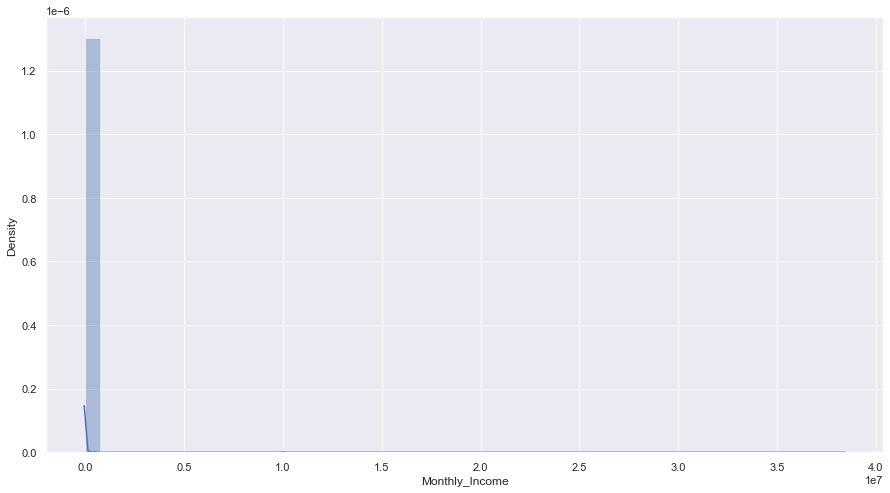

In [108]:
sns.distplot(df2.Monthly_Income)

In [109]:
stats.yeojohnson(df2.Monthly_Income)[0]

array([11.76651627, 13.07350498, 12.03507427, ..., 11.26700768,
       15.71979939, 13.53413412])

<AxesSubplot:ylabel='Density'>

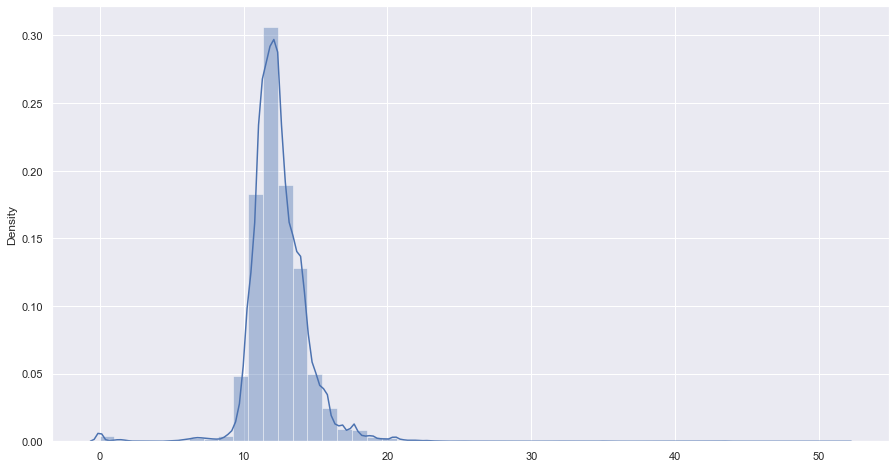

In [110]:
sns.distplot(stats.yeojohnson(df2.Monthly_Income)[0])

In [111]:
pd.DataFrame( stats.yeojohnson(df2.Monthly_Income)[0]).skew()  ##Yeo-Johnson Transformation to reduce highly skewed Monthly Income data.

0    0.529439
dtype: float64

In [112]:
df2['Yeo_Scaled_Income'] = pd.Series(stats.yeojohnson(df2.Monthly_Income)[0])

In [113]:
df2.Yeo_Scaled_Income.skew()

0.5294394901755187

In [114]:
ols('Yeo_Scaled_Income~City_Code', data = df2).fit().summary() ## Now we can categorize city codes basis monthly income.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Yeo_Scaled_Income   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.955
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          6.13e-229
Time:                        14:37:29   Log-Likelihood:            -1.4467e+05
No. Observations:               68899   AIC:                         2.907e+05
Df Residuals:                   68221   BIC:                         2.969e+05
Df Model:                         677                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.8357      0.020    646.746      0.000      12.797      12.875
City_Code[T.C10002]    -0.0255      0.029     -0.877      0.381      -0.083       0.032
City_Code[T.C10003]    -0.3995      0.029    -13.712      0.000      -0.457      -0.342
City_Code[T.C10004]    -0.2814      0.033     -8.608      0.000      -0.345      -0.217
City_Code[T.C10005]    -0.5177      0.033    -15.594      0.000      -0.583      -0.453
City_Code[T.C10006]    -0.3067      0.036     -8.405      0.000      -0.378      -0.235
City_Code[T.C10007]    -0.8284      0.046    -18.048      0.000      -0.918      -0.738
City_Code[T.C10008]    -0.7673      0.056    -13.755      0.000      -0.877      -0.658
City_Code[T.C10009]    -0.8177      0.064    -12.730      0.000      -0.944      -0.692
City_Code[T.C10010]    -0.1078      0.067     -1.608      0.108      -0.239       0.024
City_Code[T.C10011]    -1.0279      0.068    -15.103      0.000      -1.161      -0.895
City_Code[T.C10012]    -0.7164      0.077     -9.334      0.000      -0.867      -0.566
City_Code[T.C10013]    -0.7983      0.078    -10.188      0.000      -0.952      -0.645
City_Code[T.C10014]    -0.7175      0.081     -8.825      0.000      -0.877      -0.558
City_Code[T.C10015]    -0.5215      0.083     -6.264      0.000      -0.685      -0.358
City_Code[T.C10016]    -0.9729      0.084    -11.585      0.000      -1.137      -0.808
City_Code[T.C10017]    -0.9675      0.092    -10.512      0.000      -1.148      -0.787
City_Code[T.C10018]    -0.8776      0.093     -9.414      0.000      -1.060      -0.695
City_Code[T.C10019]    -0.5367      0.094     -5.739      0.000      -0.720      -0.353
City_Code[T.C10020]    -0.4649      0.096     -4.839      0.000      -0.653      -0.277
City_Code[T.C10021]    -0.8622      0.100     -8.659      0.000      -1.057      -0.667
City_Code[T.C10022]    -0.5288      0.101     -5.211      0.000      -0.728      -0.330
City_Code[T.C10023]    -0.5591      0.108     -5.186      0.000      -0.770      -0.348
City_Code[T.C10024]    -0.5311      0.107     -4.974      0.000      -0.740      -0.322
City_Code[T.C10025]    -0.4302      0.116     -3.698      0.000      -0.658      -0.202
City_Code[T.C10026]    -1.2004      0.117    -10.286      0.000      -1.429      -0.972
City_Code[T.C10027]    -0.0580      0.119     -0.487      0.626      -0.291       0.175
City_Code[T.C10028]    -0.6907      0.126     -5.486      0.000      -0.937      -0.444
City_Code[T.C10029]    -0.9799      0.132     -7.432      0.000      -1.238      -0.721
City_Code[T.C10030]    -0.8162      0.135     -6.032      0.000      -1.081      -0.551
City_Code[T.C10031]    -0.9458      0.139     -6.784      0.000      -1.219      -0.673
City_Code[T.C10032]    -0.9327      0.141     -6.611      0.000      -1.209      -0.656
Cit